In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("..\medical_insurance.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [17]:
x = df["bmi"].to_numpy()
x

array([27.9  , 33.77 , 33.   , ..., 26.03 , 18.715, 31.6  ])

In [18]:
y = df["charges"].to_numpy()
y

array([16884.924  ,  1725.5523 ,  4449.462  , ..., 16450.8947 ,
       21595.38229,  9850.432  ])

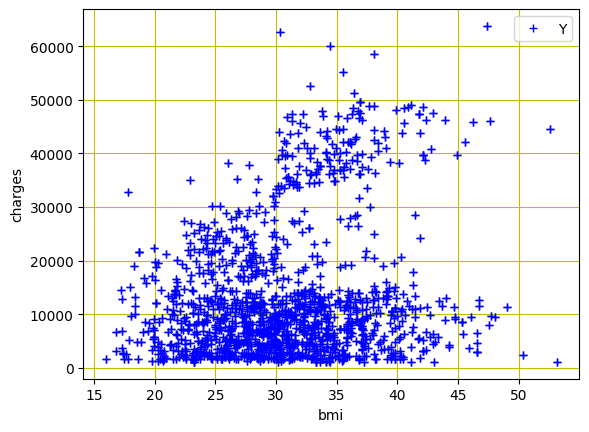

In [19]:
plt.plot(x, y, "b+", label="Y")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()
plt.grid(True, color="y")
plt.show()

In [20]:
import sklearn
import sklearn.model_selection
from sklearn import preprocessing

# train test split, 0.7 and 0.3
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
print(len(x_train), ",", len(x_test), ",", len(y_train), ",", len(y_test))

x_train = x_train.astype(np.float32)
x_train = x_train.reshape(-1, 1)

x_test = x_test.astype(np.float32)
x_test = x_test.reshape(-1, 1)

y_train = y_train.astype(np.float32)
y_train = y_train.reshape(-1, 1)

y_test = y_test.astype(np.float32)
y_test = y_test.reshape(-1, 1)

print(x_train.dtype)

data_normalizer = preprocessing.MinMaxScaler()

x_train = data_normalizer.fit_transform(x_train)
x_test = data_normalizer.fit_transform(x_test)
y_train = data_normalizer.fit_transform(y_train)
y_test = data_normalizer.fit_transform(y_test)
x_train


1940 , 832 , 1940 , 832
float32


array([[0.5032768 ],
       [0.47992894],
       [0.25163838],
       ...,
       [0.2160022 ],
       [0.25163838],
       [0.86400867]], dtype=float32)

In [21]:
1940 + 832

2772

In [22]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [23]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim=input_dim, output_dim=output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device=device)

criterion = nn.MSELoss()

learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [24]:
epochs = 1000
loss_list = []

for epoch in range(epochs):
    epoch += 1

    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss_list.append(loss)

    loss.backward()

    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 1, loss 0.10749684274196625
epoch 2, loss 0.10725577920675278
epoch 3, loss 0.10679984092712402
epoch 4, loss 0.10615433007478714
epoch 5, loss 0.10534331947565079
epoch 6, loss 0.10438954830169678
epoch 7, loss 0.10331427305936813
epoch 8, loss 0.10213719308376312
epoch 9, loss 0.10087644308805466
epoch 10, loss 0.0995485931634903
epoch 11, loss 0.09816870838403702
epoch 12, loss 0.09675035625696182
epoch 13, loss 0.09530571103096008
epoch 14, loss 0.09384563565254211
epoch 15, loss 0.09237973392009735
epoch 16, loss 0.09091643244028091
epoch 17, loss 0.08946309983730316
epoch 18, loss 0.08802610635757446
epoch 19, loss 0.08661090582609177
epoch 20, loss 0.08522211760282516
epoch 21, loss 0.08386362344026566
epoch 22, loss 0.08253862708806992
epoch 23, loss 0.08124969154596329
epoch 24, loss 0.07999885827302933
epoch 25, loss 0.0787876769900322
epoch 26, loss 0.07761727273464203
epoch 27, loss 0.07648836076259613
epoch 28, loss 0.07540135830640793
epoch 29, loss 0.07435635477304

In [25]:
# get float values out of tensors
loss_list_float = [x.item() for x in loss_list]
loss_list_float

[0.10749684274196625,
 0.10725577920675278,
 0.10679984092712402,
 0.10615433007478714,
 0.10534331947565079,
 0.10438954830169678,
 0.10331427305936813,
 0.10213719308376312,
 0.10087644308805466,
 0.0995485931634903,
 0.09816870838403702,
 0.09675035625696182,
 0.09530571103096008,
 0.09384563565254211,
 0.09237973392009735,
 0.09091643244028091,
 0.08946309983730316,
 0.08802610635757446,
 0.08661090582609177,
 0.08522211760282516,
 0.08386362344026566,
 0.08253862708806992,
 0.08124969154596329,
 0.07999885827302933,
 0.0787876769900322,
 0.07761727273464203,
 0.07648836076259613,
 0.07540135830640793,
 0.07435635477304459,
 0.07335322350263596,
 0.07239159941673279,
 0.07147090882062912,
 0.07059046626091003,
 0.06974943727254868,
 0.06894689053297043,
 0.06818176805973053,
 0.06745299696922302,
 0.06675940752029419,
 0.06609981507062912,
 0.06547302007675171,
 0.06487777829170227,
 0.06431283801794052,
 0.06377698481082916,
 0.0632689818739891,
 0.06278762966394424,
 0.0623317211

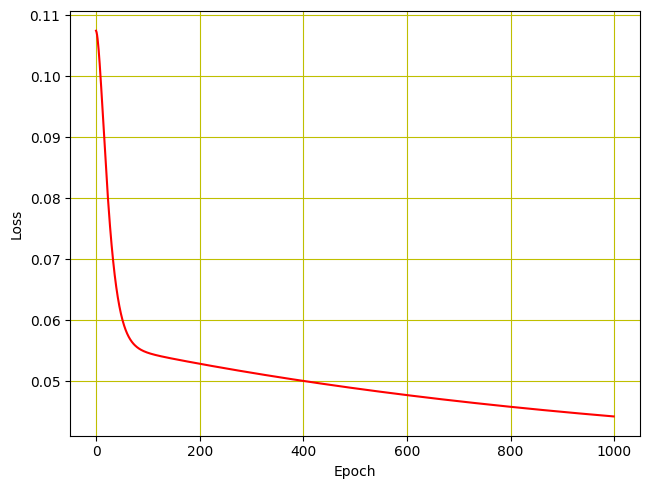

In [26]:
plt.plot(loss_list_float, "r")
plt.tight_layout()
plt.grid("True", color="y")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [27]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7398]], device='cuda:0')),
             ('linear.bias', tensor([-0.1044], device='cuda:0'))])

In [28]:
# save model weights, model object needed
import os

dir_name = os.path.abspath(".")
model_name = "linear1"

PATH = dir_name + "\\" + model_name

torch.save(model.state_dict(), PATH)

In [32]:
# export model in torchscript format
model_scripted = torch.jit.script(model)
model_scripted_name = PATH + ".pt"
model_scripted.save(model_scripted_name)

In [29]:
# load model for testing
# model = LinearRegressionModel(1,1)
# model.load_state_dict(torch.load(PATH, map_location="cuda:0"))
# model.to(device=device)
# model.eval()

In [30]:
len(x_test), len(y_test)

(832, 832)